<a href="https://colab.research.google.com/github/naga-dheeraj-p/Machine_LEARNING_projects/blob/main/PythonCSVDataIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Assignment_Python_CSV_DataIntegration**




In [97]:
# Imported all the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Linked drive to extract the folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ITERATING THROUGH EACH csv file IN THE FOLDER

In [99]:
#Implemented a loop to iterate through each file in the folder instead of reading each file separately.
for i in ['NiftyIndicesData.csv','AdditionalCSV1.csv','AdditionalCSV2.csv']:
  folder_path = '/content/drive/MyDrive/PythonCSVDataIntegration'
  file_path = os.path.join(folder_path, i)  # Linked csv_path with folder_path
  if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    data['Date']=pd.to_datetime(data['Date'])  # To bring uniformity in date column in all three csv files
    data['Date'] = data['Date'].dt.strftime('%d/%m/%Y') # Converted the date format into Indian format DD-MM-YYYY
    display(data.head())
  else:
    print('the csv file you are looking for isnt here')

<ipython-input-99-1e64f6c98817>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date']=pd.to_datetime(data['Date'])  # To bring uniformity in date column in all three csv files


,Date,Nifty50,Nifty100,Nifty200,Nifty500
0,25/01/2022,17278.0,17489.0,9129.0,14832.0
1,27/01/2022,17110.0,17302.0,9031.0,14680.0
2,28/01/2022,17102.0,17315.0,9055.0,14723.0
3,31/01/2022,17340.0,17547.0,9179.0,14921.0
4,02/01/2022,17577.0,17796.0,9306.0,15116.0


,Date,Nifty50
0,15/03/2024,22023.35
1,14/03/2024,22146.65
2,13/03/2024,21997.70
3,12/03/2024,22335.70
4,11/03/2024,22332.65


,Date,Nifty200
0,15/03/2024,12080.65
1,14/03/2024,12147.85
2,13/03/2024,12008.80
3,12/03/2024,12293.65
4,11/03/2024,12345.70


In [100]:
NiftyIndicesData = pd.read_csv('/content/drive/MyDrive/PythonCSVDataIntegration/NiftyIndicesData.csv')
# csv files which are to be added into original file
appending_csv_files = ['/content/drive/MyDrive/PythonCSVDataIntegration/AdditionalCSV1.csv',
                       '/content/drive/MyDrive/PythonCSVDataIntegration/AdditionalCSV2.csv']

# Created an empty DataFrame to hold appended data
NiftyIndicesData_df = pd.DataFrame()

# Iterate through each appending CSV file
for i in appending_csv_files:
    appending_data = pd.read_csv(i)
    NiftyIndicesData = pd.concat([NiftyIndicesData, appending_data], ignore_index=True)

NiftyIndicesData['Date'] = pd.to_datetime(NiftyIndicesData['Date']) #Converting 'Date' column to datetime format


NiftyIndicesData = NiftyIndicesData.set_index('Date') # Setting 'Date' column as the index

date_range = pd.date_range(start=NiftyIndicesData.index.min(), end=NiftyIndicesData.index.max(), freq='D')# Created a new DataFrame with a complete range of dates
complete_NiftyIndicesData_df = pd.DataFrame(index=date_range)

merged_df = complete_NiftyIndicesData_df.merge(NiftyIndicesData, left_index=True, right_index=True, how='left')# Merged the new DataFrame with the original DataFrame, filling in missing values

merged_df = merged_df.reset_index()# Reseting the index to have 'Date' as a column again
merged_NiftyIndicesData_df= merged_df.rename(columns={'index': 'Date'})

final_NiftyIndicesData_df = merged_NiftyIndicesData_df.groupby('Date').max(numeric_only=True).reset_index() #Grouping by date & taking  maximum value for each date


final_NiftyIndicesData_df = final_NiftyIndicesData_df.sort_values(by='Date').reset_index(drop=True) #Sorting by Date column


final_NiftyIndicesData_df.drop_duplicates(inplace=True)# Dropping duplicate rows because some dates are in both csv files
final_NiftyIndicesData_df


<ipython-input-100-63dae8048be3>:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  NiftyIndicesData['Date'] = pd.to_datetime(NiftyIndicesData['Date']) #Converting 'Date' column to datetime format


,Date,Nifty50,Nifty100,Nifty200,Nifty500
0,2022-01-02,17577.00,17796.0,9306.00,15116.0
1,2022-01-03,NaN,NaN,NaN,NaN
2,2022-01-04,17670.00,17880.0,9324.00,15087.0
3,2022-01-05,NaN,NaN,NaN,NaN
4,2022-01-06,16523.00,16689.0,8711.00,14083.0
...,...,...,...,...,...
799,2024-03-11,22332.65,NaN,12345.70,NaN
800,2024-03-12,22335.70,NaN,12293.65,NaN
801,2024-03-13,21997.70,NaN,12008.80,NaN
802,2024-03-14,22146.65,NaN,12147.85,NaN


**Here I have forward filled the values from the previous data where the data is NaN**

In [101]:
col_names=['Nifty50','Nifty100','Nifty200','Nifty500']
for j in col_names: #iterated through each column
  for i in range(1,len(final_NiftyIndicesData_df[j])):
    if pd.isna(final_NiftyIndicesData_df[j][i]): #If its null then it'll copy the previous row value
      final_NiftyIndicesData_df[j][i]=final_NiftyIndicesData_df[j][i-1]

final_NiftyIndicesData_df.head(20)

<ipython-input-101-f01cd5e84426>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_NiftyIndicesData_df[j][i]=final_NiftyIndicesData_df[j][i-1]


,Date,Nifty50,Nifty100,Nifty200,Nifty500
0,2022-01-02,17577.0,17796.0,9306.0,15116.0
1,2022-01-03,17577.0,17796.0,9306.0,15116.0
2,2022-01-04,17670.0,17880.0,9324.0,15087.0
3,2022-01-05,17670.0,17880.0,9324.0,15087.0
4,2022-01-06,16523.0,16689.0,8711.0,14083.0
5,2022-01-07,15752.0,15926.0,8295.0,13394.0
6,2022-01-08,17340.0,17599.0,9198.0,14847.0
7,2022-01-09,17543.0,17924.0,9402.0,15211.0
8,2022-01-10,17543.0,17924.0,9402.0,15211.0
9,2022-01-11,18145.0,18383.0,9619.0,15537.0


In [102]:
main_file='main_file.csv'
final_NiftyIndicesData_df.to_csv(main_file, index=False) #saving the final main file with all the necessary changes

In [103]:
a=pd.read_csv('/content/main_file.csv')
a

,Date,Nifty50,Nifty100,Nifty200,Nifty500
0,2022-01-02,17577.00,17796.00,9306.00,15116.0
1,2022-01-03,17577.00,17796.00,9306.00,15116.0
2,2022-01-04,17670.00,17880.00,9324.00,15087.0
3,2022-01-05,17670.00,17880.00,9324.00,15087.0
4,2022-01-06,16523.00,16689.00,8711.00,14083.0
...,...,...,...,...,...
799,2024-03-11,22332.65,19544.45,12345.70,17361.1
800,2024-03-12,22335.70,19544.45,12293.65,17361.1
801,2024-03-13,21997.70,19544.45,12008.80,17361.1
802,2024-03-14,22146.65,19544.45,12147.85,17361.1


**PLOTTING THE POINTS IN MATPLOTLIB FOR VISUALIZATION**

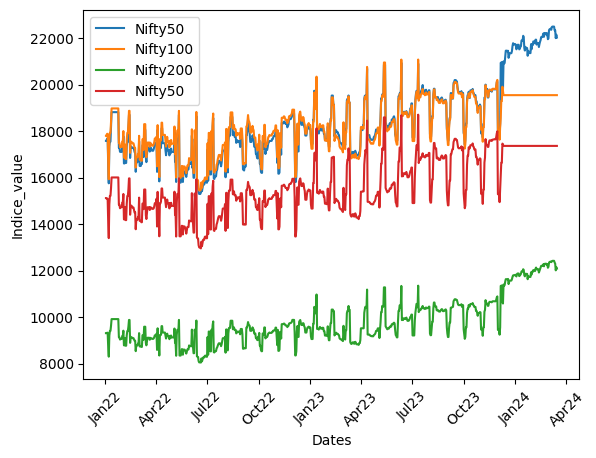

In [104]:
#plotting main_csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

a=final_NiftyIndicesData_df # i have replaced 'final_NiftyIndicesData_df' with 'a'

plt.plot(a.iloc[:,0],a.iloc[:,1],label='Nifty50')
plt.plot(a.iloc[:,0],a.iloc[:,2],label='Nifty100')
plt.plot(a.iloc[:,0],a.iloc[:,3],label='Nifty200')
plt.plot(a.iloc[:,0],a.iloc[:,4],label='Nifty50')

plt.xlabel('Dates')
plt.ylabel('Indice_value')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
plt.xticks(rotation=45)
plt.legend()
plt.show()